# ENS 491 Project

In [1]:
import os
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
os.getcwd()

'/Users/giraycoskun/Documents/MATLAB/Deep-SSVEP-BCI'

In [2]:
import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from scipy.io import loadmat
from scipy.fft import fft, fftfreq
from scipy.signal import cheby1, filtfilt

In [6]:
import time

## Benchmark Dataset

data: [64×1500×40×6 double]

In [7]:
total_subject = 35
total_block = 6
total_target = 40
total_channel = 64

sampling_rate = 250
visual_cue = 0.5
visual_latency = 0.136
signal_length = 6

total_delay = visual_latency+visual_cue
delay_sample_point = round(total_delay*sampling_rate)

In [8]:
sample_length = sampling_rate*signal_length
sample_interval = np.arange((delay_sample_point+1), delay_sample_point+sample_length+1)

In [9]:
target_freqs = np.zeros(shape=(total_target))
idx = 8;
for i in range(0,total_target,8):
    target_freqs[i:i+8] = np.arange(idx,idx+8,1)
    idx += 0.2

## BETA Dataset

## Data Import

Creates **data_dict** with key as subject o and the value is the data of the subject

In [10]:
dataset_name = "Bench"
#datasetname = "BETA"

In [11]:
data_file = os.path.join(os.getcwd(),"DATA", dataset_name)

In [12]:
data_file

'/Users/giraycoskun/Documents/MATLAB/Deep-SSVEP-BCI/DATA/Bench'

In [13]:
Data = np.empty(shape=(total_channel, sample_length, total_target, total_block, total_subject))

In [14]:
Data.shape

(64, 1500, 40, 6, 35)

In [15]:
for subject in range(total_subject):
    data = loadmat(os.path.join(data_file, ("S"+str(subject+1)) )) #returns dict
    Data[:,:,:,:,subject] = data['data'] 

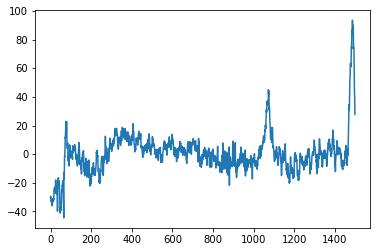

In [16]:
sample_signal = Data[0,:,0,0,0]
plt.plot(sample_signal)

## Preprocess

designfilt('bandpassiir','FilterOrder',filter_order, ...
        'PassBandFrequency1',low_cutoff(i),'PassBandFrequency2',high_cutoff(i),...
		'PassBandRipple',PassBandRipple_val,...
		'DesignMethod','cheby1','SampleRate',sampling_rate); 

In [17]:
signalLength = 5
samplingRate = sampling_rate
sampleLength = sampling_rate*signalLength
sampleInterval = np.arange((delay_sample_point+1), delay_sample_point+sampleLength+1)

In [18]:
subjectNum = total_subject
targetNum = total_target
blockNum = total_block
channels = np.arange(0,64)
channelNum = len(channels)
subbanNum = 3

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html#scipy.signal.cheby1
filter_order = 2
passband_ripple = 1
low_cut = np.arange(8,(subbanNum+1)*8,8)
high_cut = 90

In [ ]:
filter_dict = dict()
for k in range(subbanNum):
    b, a = cheby1( N = filter_order,
           rp = passband_ripple,
           Wn = [low_cut[k],high_cut],
           btype = 'bandpass',
           fs = sampling_rate)
    filter_dict[k] = (b, a)

In [ ]:
b = filter_dict[0][0]
a = filter_dict[0][1]

In [ ]:
filtered = filtfilt(b, a, sample_signal)

In [ ]:
plt.plot((filtered))

In [ ]:
processedData = np.zeros(shape=(channelNum, sampleLength, targetNum, blockNum, subjectNum, subbanNum))
labelData = np.zeros(shape=(1, targetNum, blockNum, subjectNum))

In [ ]:
processedData.shape

In [ ]:
labelData.shape

In [ ]:
for subject in range(subjectNum):
    for target in range(targetNum):
        for block in range(blockNum):
                for channel in range(channelNum):
                    for subban in range(subbanNum):
                        b = filter_dict[subban][0]
                        a = filter_dict[subban][1]
                        processedData[channel,:,target,block,subject,subban] = filtfilt(b, a, Data[channel,sampleInterval,target,block,subject])
                        labelData[0,target,block,subject] = target 

In [19]:
def Preprocess(subjectNum, targetNum, blockNum, channels, subbanNum, sampleLength, sampleInterval, samplingRate, Data):
    filter_order = 2
    passband_ripple = 1
    low_cut = np.arange(8,(subbanNum+1)*8,8)
    high_cut = 90
    
    filter_dict = dict()
    for k in range(subbanNum):
        b, a = cheby1( N = filter_order,
               rp = passband_ripple,
               Wn = [low_cut[k],high_cut],
               btype = 'bandpass',
               fs = sampling_rate)
        filter_dict[k] = (b, a)
    b = filter_dict[0][0]
    a = filter_dict[0][1]
    processedData = np.zeros(shape=(channelNum, sampleLength, targetNum, blockNum, subjectNum, subbanNum))
    labelData = np.zeros(shape=(1, targetNum, blockNum, subjectNum))
    for subject in range(subjectNum):
        for target in range(targetNum):
            for block in range(blockNum):
                for channel in range(channelNum):
                    for subban in range(subbanNum):
                        b = filter_dict[subban][0]
                        a = filter_dict[subban][1]
                        processedData[channel,:,target,block,subject,subban] = filtfilt(b, a, Data[channel,sampleInterval,target,block,subject])
                        labelData[0,target,block,subject] = target 
    return processedData, labelData

In [20]:
start = time.time()

In [21]:
processedData, labelData = Preprocess(subjectNum, targetNum, blockNum, 
                                      channels, subbanNum, sampleLength, 
                                      sampleInterval, samplingRate, Data)

KeyboardInterrupt: 

In [22]:
end = time.time()
print("Elapsed Time: ", (end - start))
print("Sample Length: ", sampleLength)

Elapsed Time:  1790.657269001007
Sample Length:  1250


In [ ]:
processsedData.shape

In [ ]:
labelData.shape

## Get FFT Results

In [ ]:
rank = 0
N = total_target*total_block*total_subject #8400

In [ ]:
means_r = []
means_a =[]
means_b = []
vars_r = []
cov_a = []
cov_b = []
traces_a = []
traces_b = []

In [ ]:
sample_points = np.arange(50, sampleLength+50, 50)
signal_lengths = np.divide(sample_points, 250)

In [ ]:
for idx in range(len(signal_lengths)):
    sample_length = signal_lengths(idx)*sampling_rate
    sample_interval = (delay_sample_point+1):delay_sample_point+sample_lengthx
    #AllData,y_AllData=Preprocess2(channels,sample_length,sample_interval,subban_no,total_subject,total_block,total_character,sampling_rate,dataset);
    
    
    T = samp_pts(idx)
    
    S = sampling_rate; %sampling rate = 250
    t = linspace(1/S, T/S, T); %t = 1/S, 2/S, ... , T/S


In [ ]:
sampleLength

In [ ]:
samp_pts = (50:50:1250);

signal_lengths = samp_pts./250;
for idx = 1:length(samp_pts)
    sample_length = signal_lengths(idx)*sampling_rate;
    sample_interval = (delay_sample_point+1):delay_sample_point+sample_length;
    [AllData,y_AllData]=Preprocess2(channels,sample_length,sample_interval,subban_no,total_subject,total_block,total_character,sampling_rate,dataset);
    
    
    T = samp_pts(idx);
    
    S = sampling_rate; %sampling rate = 250
    t = linspace(1/S, T/S, T); %t = 1/S, 2/S, ... , T/S

    max_as = [];
    max_bs =[];
    max_rs = [];
    for subj = 1:total_subject
        for char_chosen = 1:total_character
            for block_chosen = 1:total_block
                %X -> channels, datapoints in time T, bandpass = 1, target, block, subject                
                    X = AllData(:, (1:T), 1,char_chosen , block_chosen, subj); %[8 x 750] -Block, subband ve subject secimi?
                    %create harmonics given the frequency of the characters
                    r_list = [];
                    A_list = [];
                    B_list = [];
                    
                    if rank == 0
                        f = char_freqs(char_chosen); %character frequency
                        Y = [sin(2*pi*f*t);
                            cos(2*pi*f*t); 
                            sin(4*pi*f*t);
                            cos(4*pi*f*t);
                            sin(6*pi*f*t);
                            cos(6*pi*f*t);
                            sin(8*pi*f*t);
                            cos(8*pi*f*t);
                            sin(10*pi*f*t);
                            cos(10*pi*f*t)];  %y(t) 6 x 750 


                            [A,B,r,U,V,stats] = canoncorr(X',Y');
                            r_list(end+1) = r(1);
                            A_list = [A_list A(:,1)];
                            B_list = [B_list B(:,1)];
                        
                    else  
                        for target = 1:total_character
                            %create harmonics given the frequency of the characters
                            f = char_freqs(target); %character frequency
                            Y = [sin(2*pi*f*t);
                                cos(2*pi*f*t); 
                                sin(4*pi*f*t);
                                cos(4*pi*f*t);
                                sin(6*pi*f*t);
                                cos(6*pi*f*t);
                                sin(8*pi*f*t);
                                cos(8*pi*f*t);
                                sin(10*pi*f*t);
                                cos(10*pi*f*t)];  %y(t) 6 x 750 


                            [A,B,r,U,V,stats] = canoncorr(X',Y');
                            r_list(end+1) = r(1);
                            A_list = [A_list A(:,1)];
                            B_list = [B_list B(:,1)];
                        end
                    end
                    %TODO with rank
                    max_cor = max(r_list);
                    found_char = find(r_list==max_cor); %return the index with maximum corr coeffient (r)
                    max_a = A_list(:,found_char);
                    max_b = B_list(:,found_char);

                    max_as = [max_as max_a];
                    max_bs = [max_bs max_b];
                    max_rs(end+1) = max(r_list);
            end
        end
    end
    
    means_r(end+1) = mean(max_rs);
    vars_r(end+1) = var(max_rs);

    %center matrices
    t = size(max_as);
    rows = t(1);
    for i = 1:rows
        cent_as(i,:) = max_as(i,:) - mean(max_as(i,:));
        cent_bs(i,:) = max_bs(i,:) - mean(max_bs(i,:));
    end

    cov_as = cent_as * cent_as' / N;
    cov_bs = cent_bs * cent_bs' / N;


    trace_as = trace(cov_as);
    trace_bs = trace(cov_bs);
    traces_a = [traces_a trace_as];
    traces_b = [traces_b trace_bs];

    means_a = [means_a mean(mean(max_as))];
    means_b = [means_b mean(mean(max_bs))];
end